In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.plotting.synthetic import *
from utils.synthetic import *

AttributeError: `np.complex_` was removed in the NumPy 2.0 release. Use `np.complex128` instead.

In [ ]:
fs = 200
location_baseline = (
    lambda on: f'data/CONTROL_BREATHING_RECORDINGS/OCHOTNIK_{on}/CLEAN_DATA_BASELINE/OCH_{on}_CLEAN_CB_BASELINE.csv'
)

In [ ]:
example_abp = pd.read_csv(location_baseline(1), sep=';', decimal=',')['abp_cnap[mmHg]'].values[10835:11433]
t = np.arange(len(example_abp)) / fs

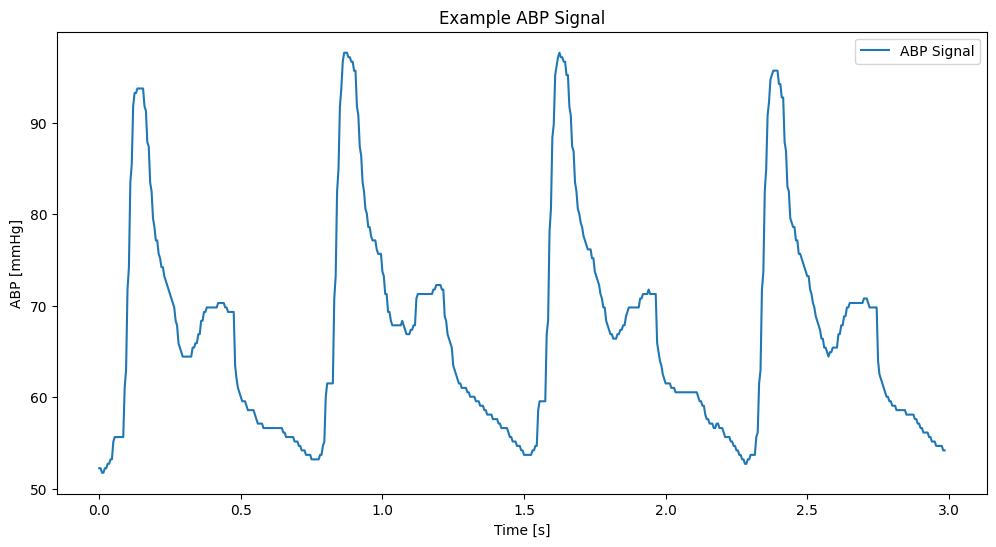

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, example_abp, label='ABP Signal')
plt.title('Example ABP Signal')
plt.xlabel('Time [s]')
plt.ylabel('ABP [mmHg]')
plt.legend()
plt.show()

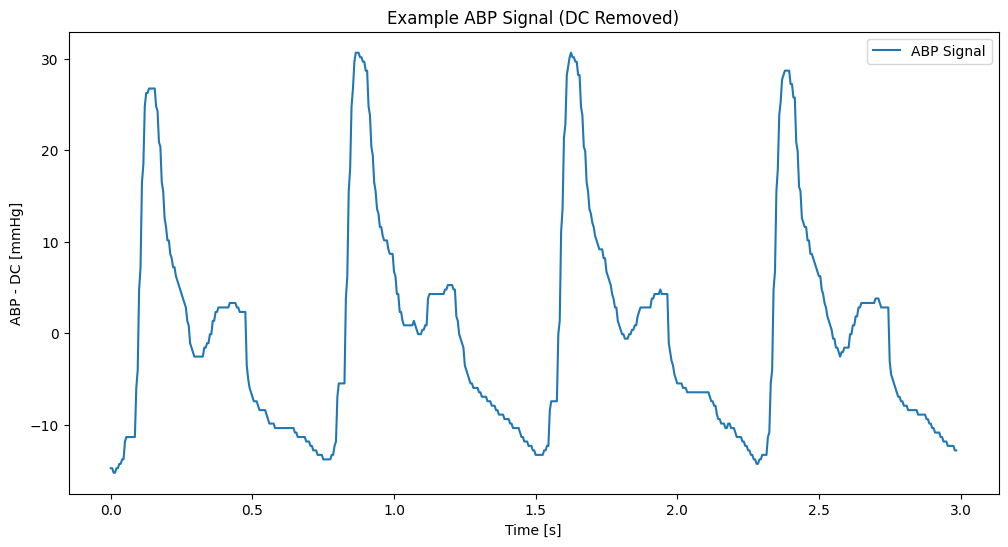

In [ ]:
# 1) remove DC
x_mean = np.mean(example_abp)
x = example_abp - x_mean
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='ABP Signal')
plt.title('Example ABP Signal (DC Removed)')
plt.xlabel('Time [s]')
plt.ylabel('ABP - DC [mmHg]')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

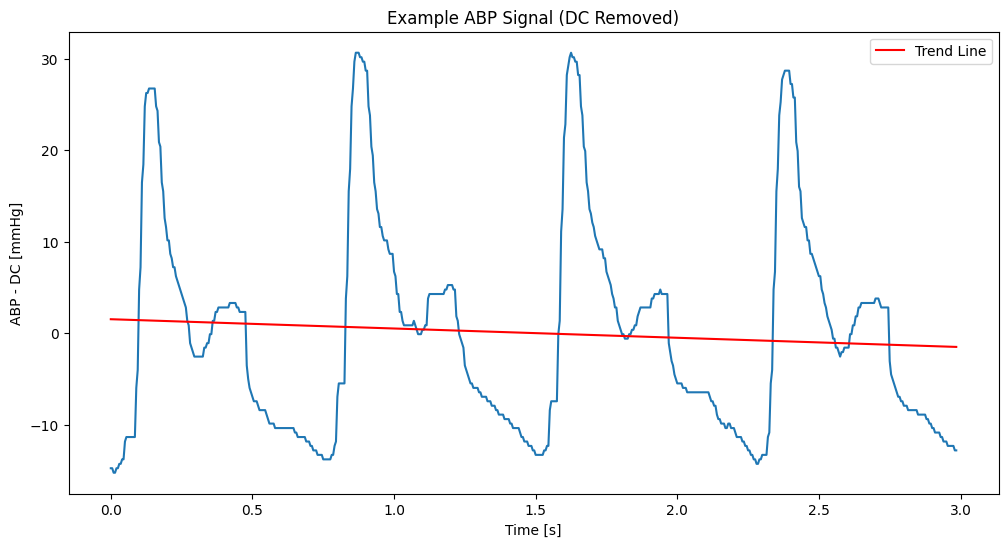

In [ ]:
# 2) detrend
plt.figure(figsize=(12, 6))

fit = np.polyfit(t, x, 1)
trend = np.polyval(fit, t)
plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.plot(t, trend, color='red', label='Trend Line')
plt.title('Example ABP Signal (DC Removed)')
plt.xlabel('Time [s]')
plt.ylabel('ABP - DC [mmHg]')
plt.legend()
plt.show()

C:\Users\Ignacy\AppData\Local\Temp\ipykernel_4040\2092110454.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


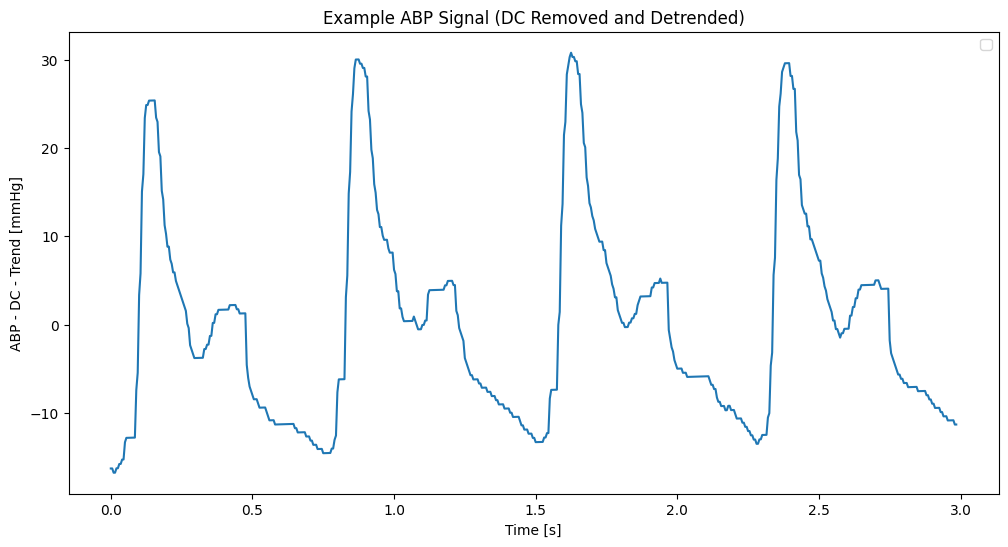

In [ ]:
# detrend
x = x - trend
plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.title('Example ABP Signal (DC Removed and Detrended)')
plt.xlabel('Time [s]')
plt.ylabel('ABP - DC - Trend [mmHg]')
plt.legend()
plt.show()

In [ ]:
fc = 30

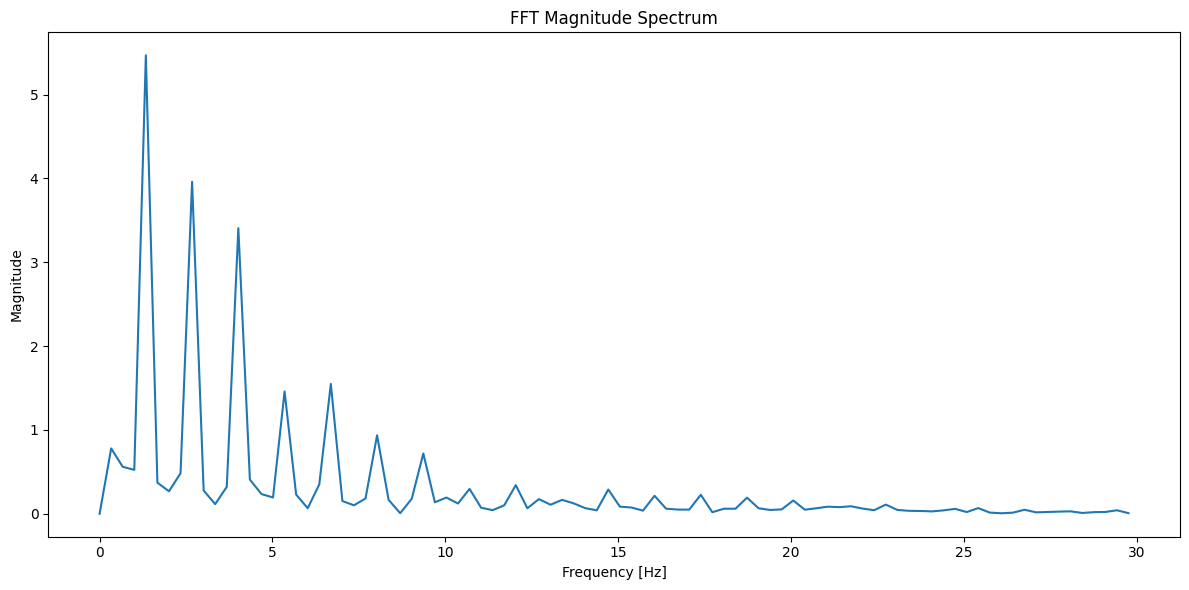

In [ ]:
X, f, mag, phases = fft_process(x, fc, fs)
plot_fft(f, mag, fc=30)

In [ ]:
selected_indices, _ = find_most_significant_frequencies(X, f, mag, min_sep=0.2, n=5)

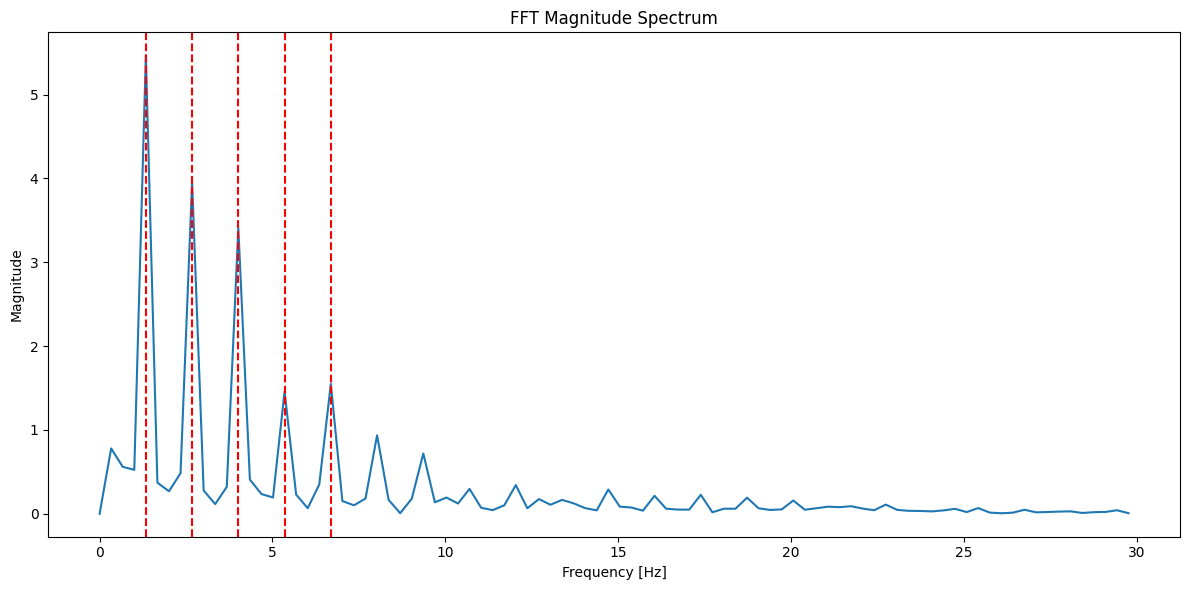

In [ ]:
plot_fft(f, mag, fc=30, freqs=f[selected_indices])

In [ ]:
X_filtered = filter_frequencies(X, selected_indices)

In [ ]:
reconstructed = reconstruct_signal(X_filtered, x_mean)

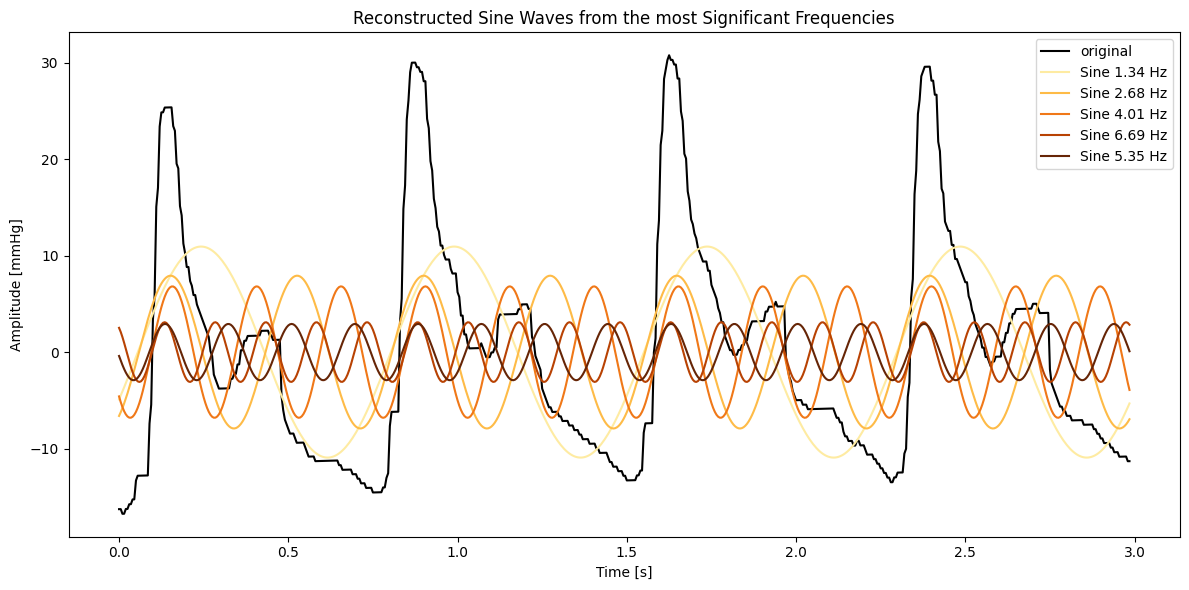

In [ ]:
plot_signal_with_reconstructed_sines(t, x, X, f, selected_indices)

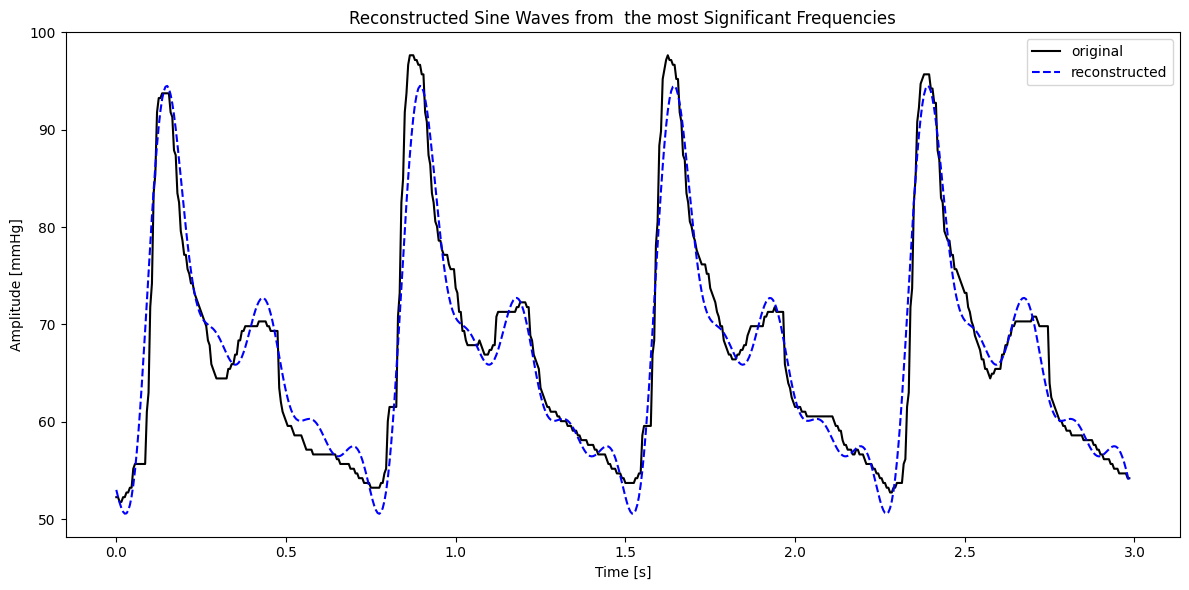

In [ ]:
plot_signal_with_reconstructed(t, example_abp, reconstructed)

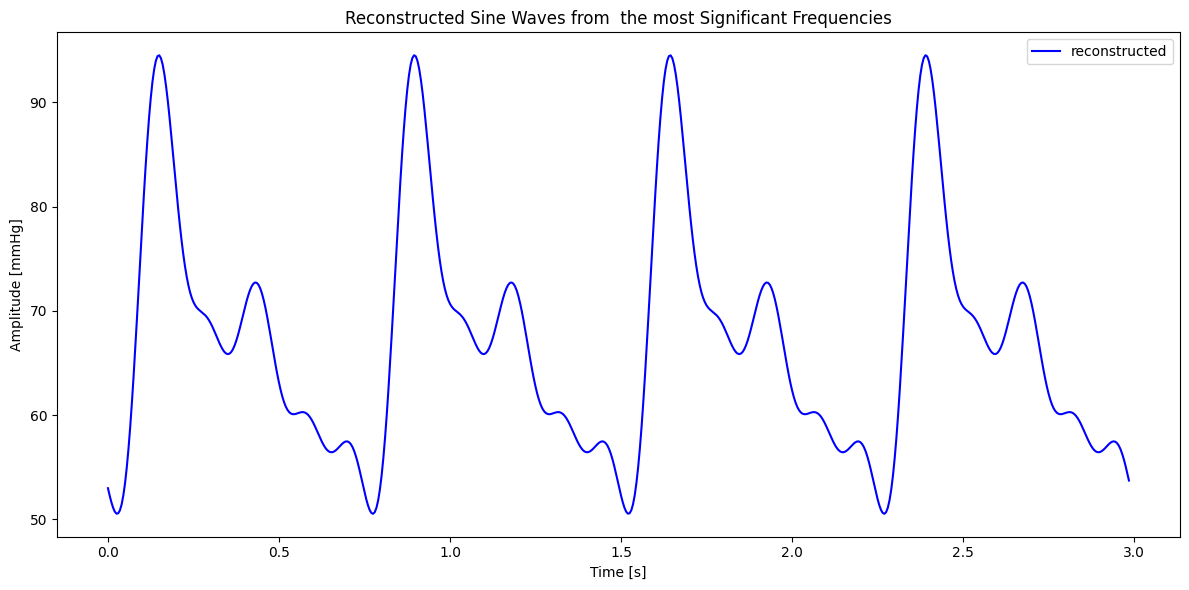

In [ ]:
plot_reconstructed_signal(t, reconstructed)